In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('../data/depression_data.csv')
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [3]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

##### Printing Summary Stats

In [4]:
df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


##### Checking for missing values

In [5]:
df.isnull().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

There are no missing values in any columns. This indicates that the dataset is complete, and no imputation is required. This is advantageous for model building since we can directly proceed with further analysis without worrying about filling gaps in the data.

##### Distribution Target Variables (History of Mental Illness)

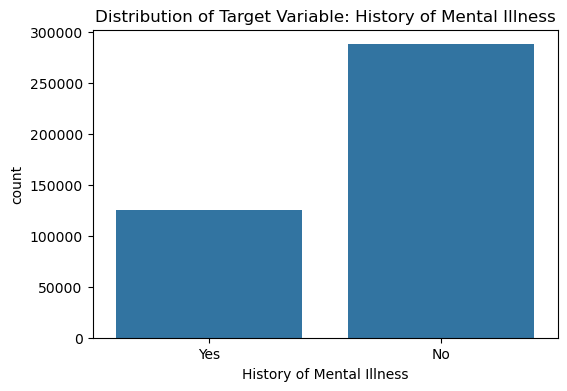

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='History of Mental Illness')
plt.title('Distribution of Target Variable: History of Mental Illness')
plt.show()

* Observation: The target variable, "History of Mental Illness," shows a clear imbalance, with significantly more individuals having no history of mental illness compared to those who do. The distribution shows that approximately 70% of the data falls under the 'No' category, while only about 30% of the individuals have a history of mental illness.
* Implication: The imbalance in the target class suggests that a resampling technique like SMOTE or class weighting might be needed during model training to avoid bias toward the majority class. This could also affect the evaluation metrics such as accuracy, and metrics like F1-score, precision, and recall may be more appropriate for measuring model performance.

##### Distribution of Numerical Variables

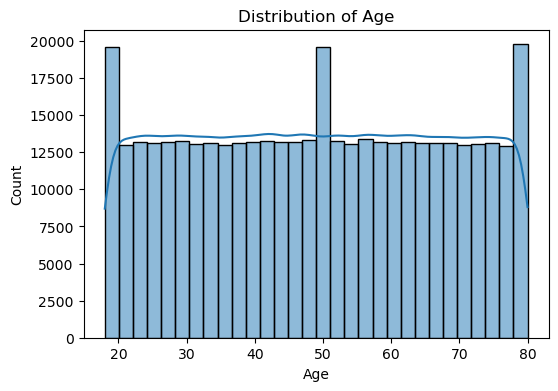

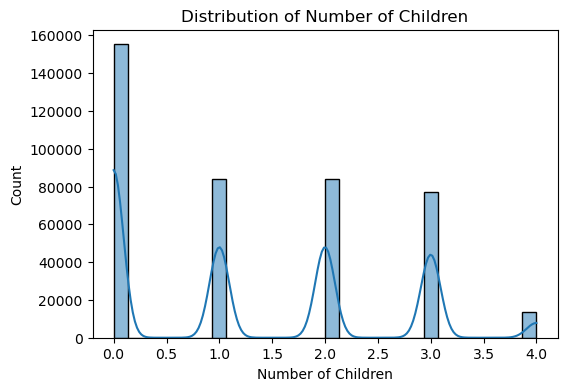

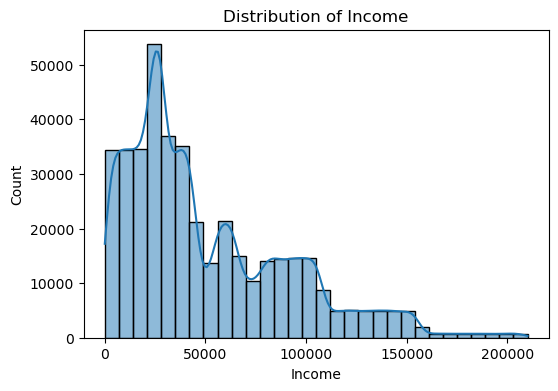

In [7]:
numerical_cols = ['Age', 'Number of Children', 'Income']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

* Age: The age distribution is fairly uniform with some noticeable spikes around certain ages (e.g., 20, 50, and 80). The data covers a wide range of ages, from 18 to 80.
  * Insight: The fairly uniform distribution suggests that the dataset is well-balanced across different age groups. The spikes may indicate sampling artifacts or trends within specific age brackets, possibly tied to life events.
 


* Income: The income distribution is right-skewed, with most individuals earning between 0 and 50,000. There are a few high-income outliers.
  * Insight: The right-skewed distribution of income indicates that most individuals in the dataset fall under low to moderate income brackets. The presence of outliers (very high incomes) may need to be accounted for during model training, either through transformation (e.g., log scaling) or outlier handling techniques.
 
    
 
* Number of Children: The number of children is also right-skewed, with a majority of individuals having 0 to 2 children.
  * Insight: Most individuals have either no children or 1-2 children. This suggests that large families are rare in this dataset.

##### Distribution of Categorical variables

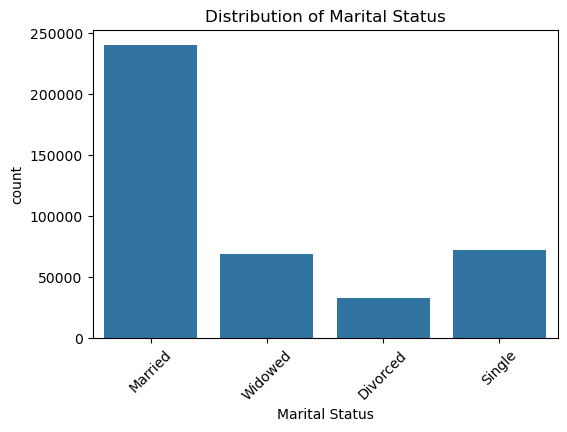

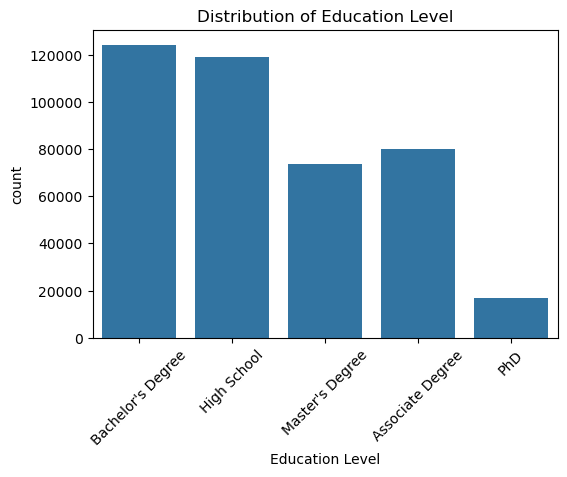

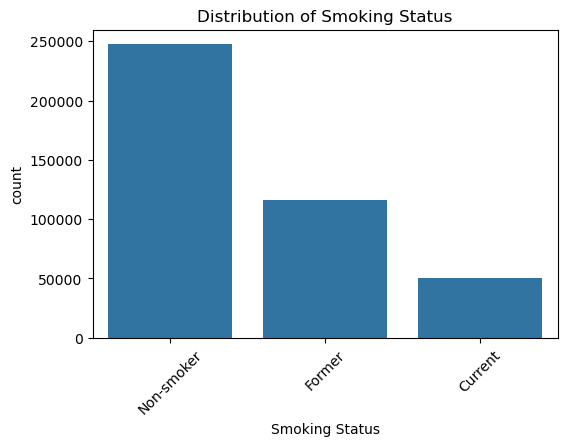

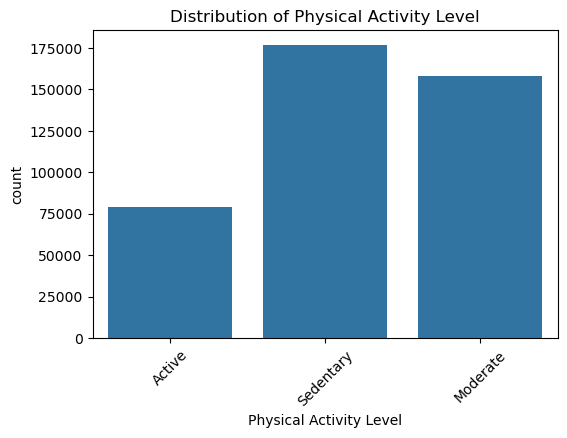

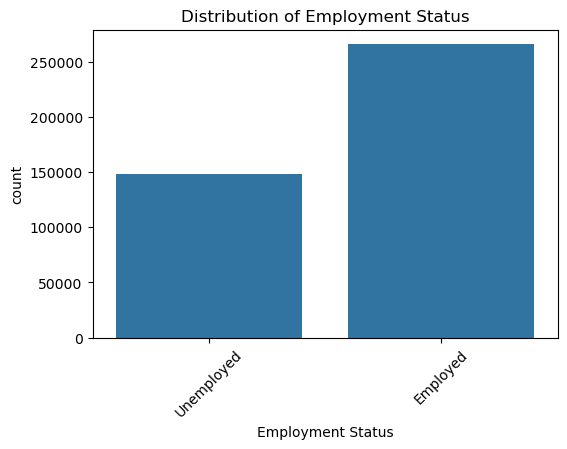

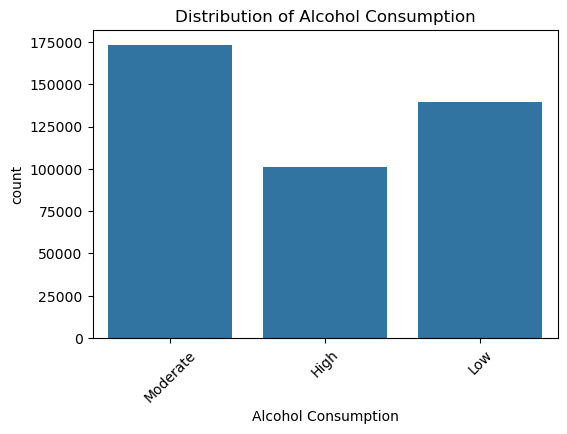

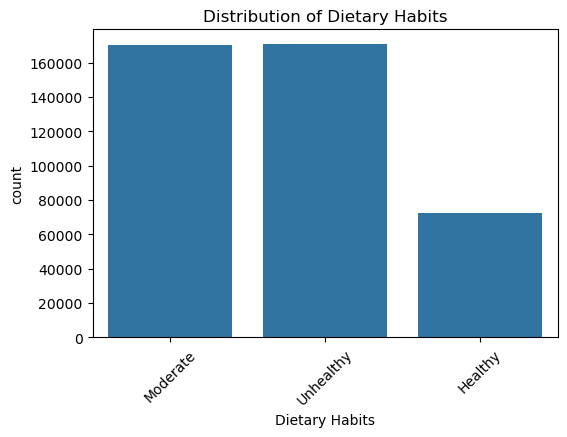

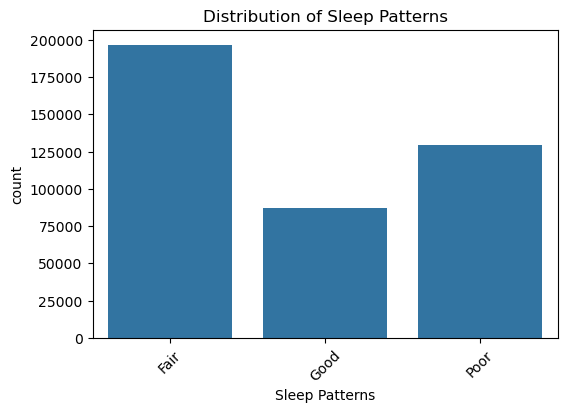

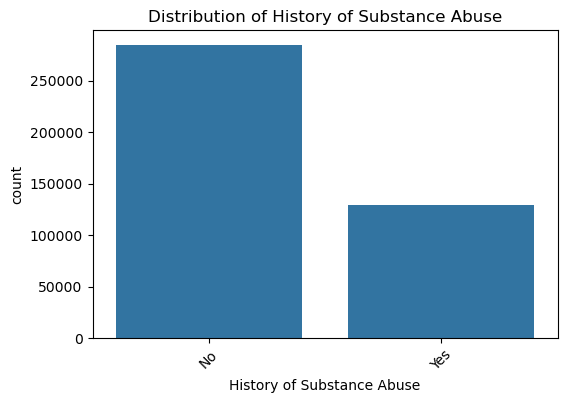

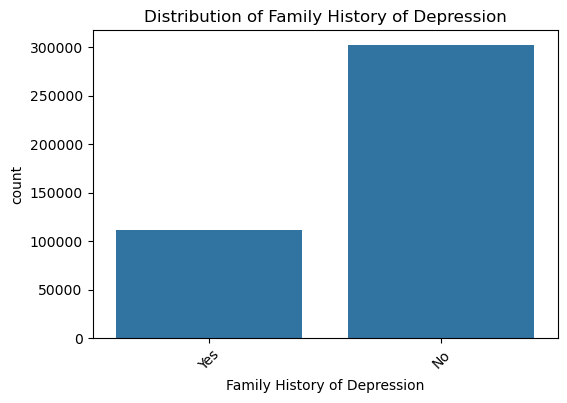

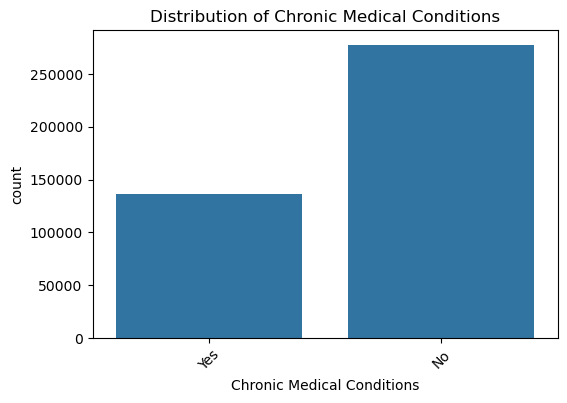

In [8]:
categorical_cols = ['Marital Status', 'Education Level', 'Smoking Status', 'Physical Activity Level',
                    'Employment Status', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
                    'History of Substance Abuse', 'Family History of Depression', 'Chronic Medical Conditions']

# Bar plots for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

* Marital Status: The dataset is dominated by married individuals, followed by single, widowed, and divorced individuals.
    * Insight: Marital status could be an important factor influencing mental health, as individuals in stable relationships may experience different stressors compared to those who are single, divorced, or widowed.

* Education Level: A significant portion of individuals hold a Bachelor's degree or have completed high school, while fewer hold advanced degrees such as PhDs.
    * Insight: Education may play a role in mental health. For instance, higher education levels could correlate with stress from professional pressures, while lower levels could be tied to socioeconomic challenges.

* Smoking Status: Most individuals in the dataset are non-smokers, while a smaller proportion are former or current smokers.
    * Insight: Smoking status is often associated with mental health. Former or current smokers might experience different mental health challenges compared to non-smokers.

* Employment Status: There is a large portion of employed individuals compared to unemployed.
    * Insight: Employment status may be a strong predictor of mental health, as unemployment is often linked to stress and anxiety.

##### Correlation of Numerical Features

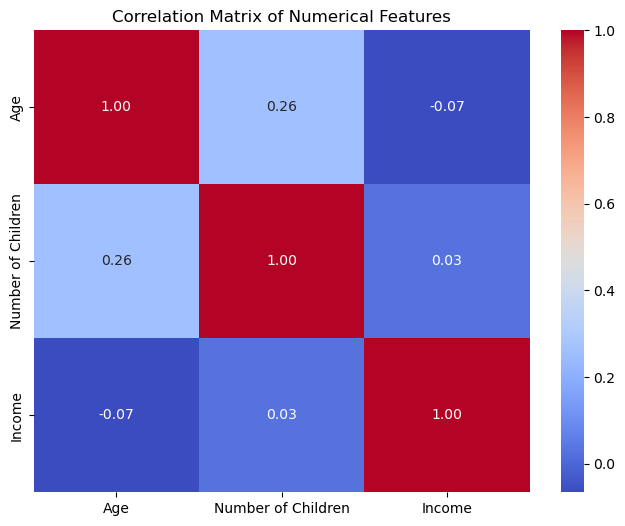

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

* The correlation heatmap shows minimal correlation between the numerical variables. Age has a slight positive correlation with the number of children, which is expected, as older individuals tend to have more children.
* Implication: Since there is no high correlation between numerical features, multicollinearity should not be an issue in the model.

##### Analysing relationships between numerical variables and target variables

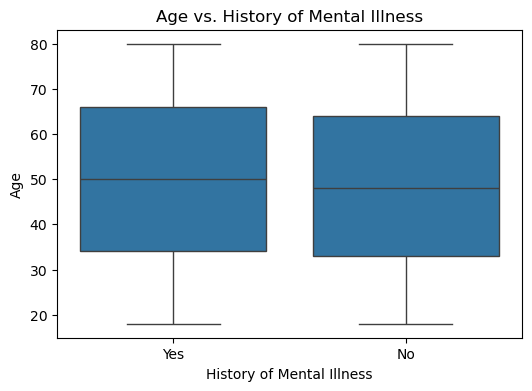

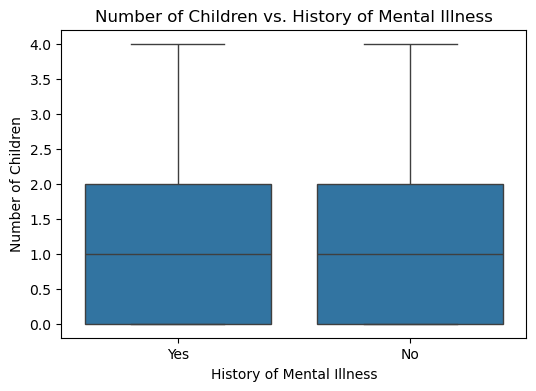

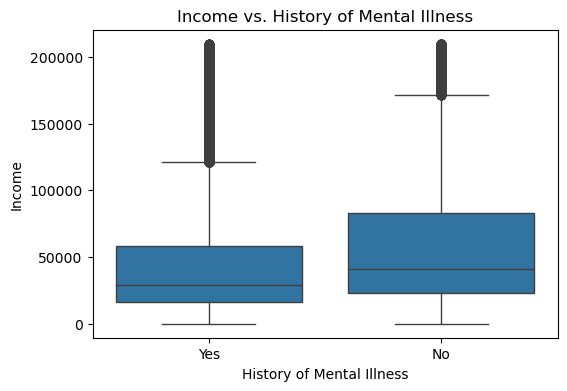

In [10]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='History of Mental Illness', y=col, data=df)
    plt.title(f'{col} vs. History of Mental Illness')
    plt.show()

* Age vs. Mental Illness: There is no clear trend between age and mental illness, as both younger and older individuals are present in both categories.
    * Insight: Age alone may not be a strong predictor of mental illness in this dataset. However, interactions with other variables (e.g., employment status or income) could reveal patterns.

* Income vs. Mental Illness: The boxplots suggest that individuals with a history of mental illness tend to have slightly lower incomes than those without. However, the distribution of income is fairly similar for both groups, with outliers present.
    * Insight: Lower income may be associated with mental health challenges, possibly due to financial stress or limited access to healthcare. The presence of income outliers indicates that high earners are rare in this dataset.

* Number of Children vs. Mental Illness: The number of children appears similar across both groups, suggesting that this feature may not have a strong direct effect on mental illness in this dataset.
    * Insight: Having more children does not seem to correlate strongly with a history of mental illness.

##### Analysing relationships between categorical variables and target variables

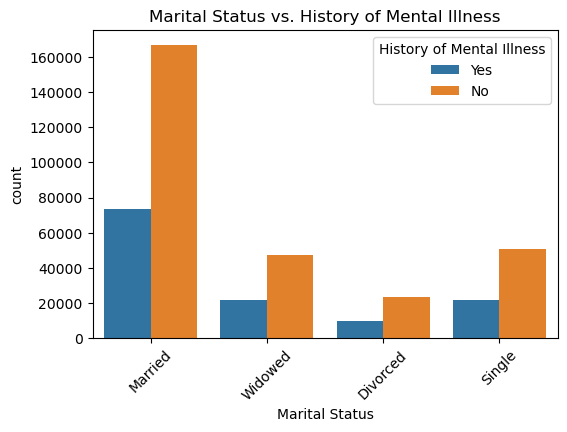

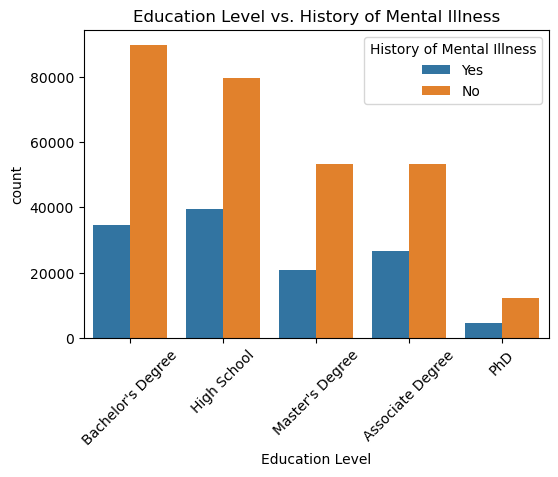

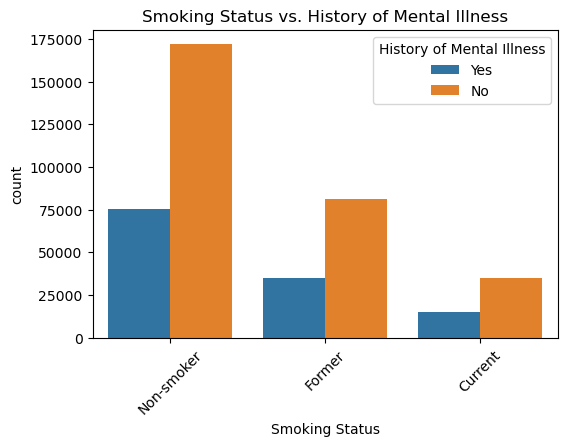

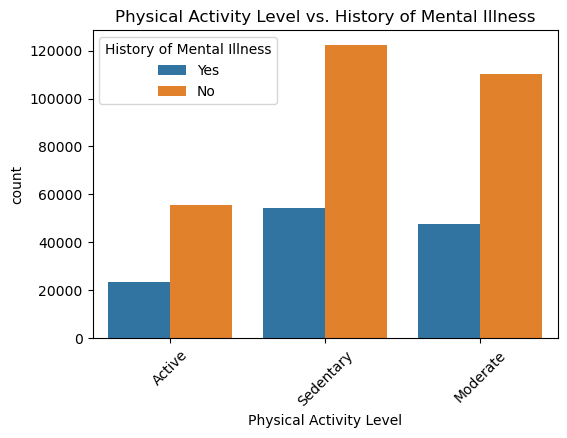

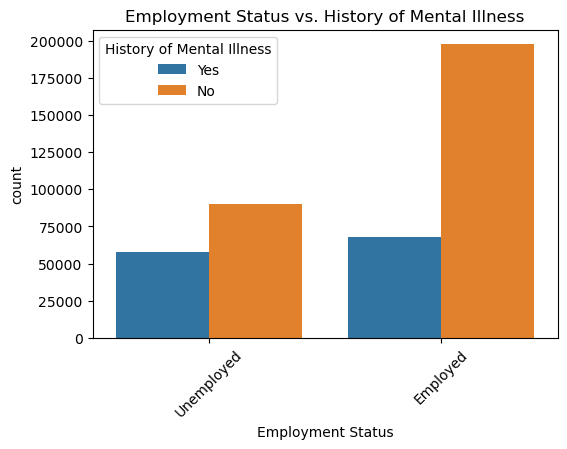

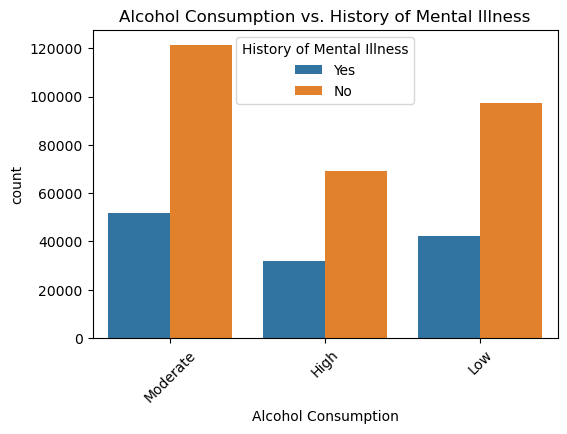

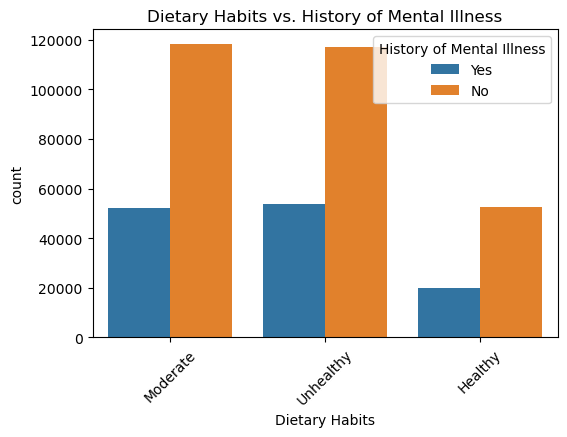

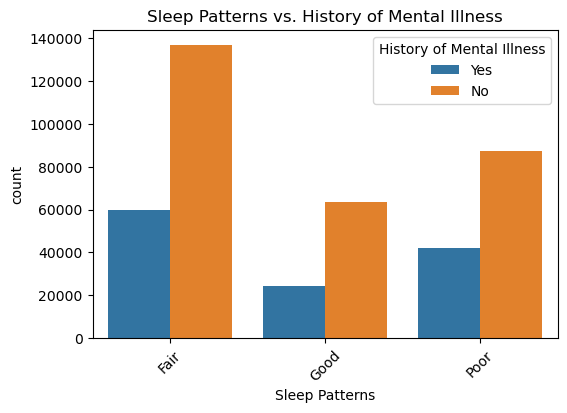

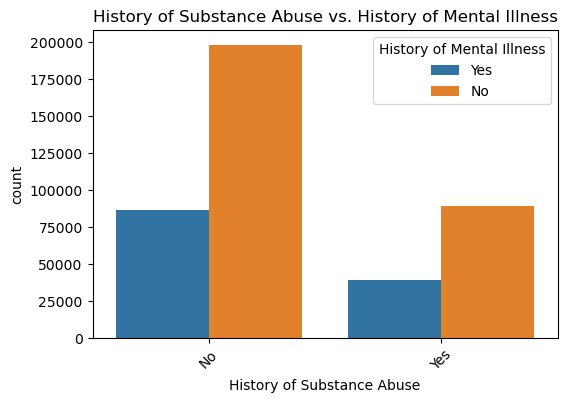

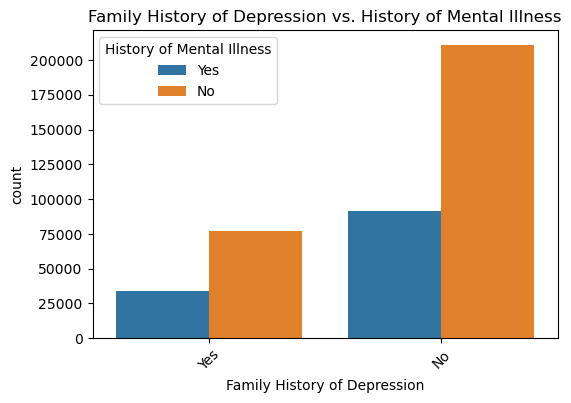

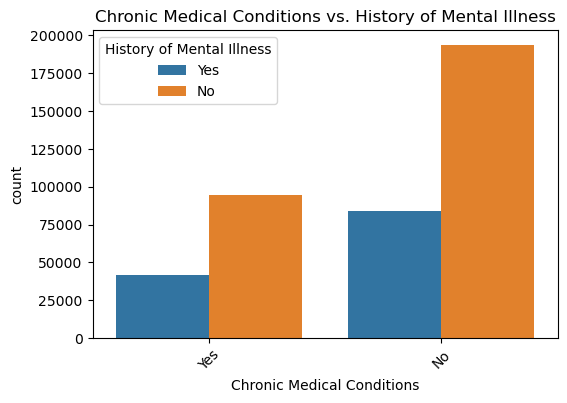

In [11]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='History of Mental Illness')
    plt.title(f'{col} vs. History of Mental Illness')
    plt.xticks(rotation=45)
    plt.show()

* Marital Status vs. Mental Illness: Married individuals seem to have lower rates of mental illness, while single, divorced, and widowed individuals show higher proportions of mental illness.
    * Insight: Marital status may have a significant impact on mental health. Single, divorced, and widowed individuals might face social isolation or emotional stress that contributes to mental health issues.

* Education Level vs. Mental Illness: There is a higher incidence of mental illness among those with lower education levels (high school and associate degrees) compared to those with higher education (PhDs).
    * Insight: Education level may play a role in mental health, with lower education possibly linked to economic stressors, while higher education may correlate with professional stress.

* Smoking Status vs. Mental Illness: Current and former smokers have higher rates of mental illness compared to non-smokers.
    * Insight: Smoking status could be a key indicator of mental health, as smoking is often used as a coping mechanism for stress.

* Physical Activity vs. Mental Illness: Individuals with sedentary lifestyles show higher rates of mental illness compared to those with active or moderate activity levels.
    * Insight: Physical activity is a known protective factor for mental health, so this variable may be a useful predictor in the model.

* Employment Status vs. Mental Illness: Unemployed individuals are more likely to have a history of mental illness compared to employed individuals.
    * Insight: Employment may be one of the strongest predictors of mental health in this dataset, as financial security and purpose are often tied to mental well-being.

##### Checking for outliers in numerical variables

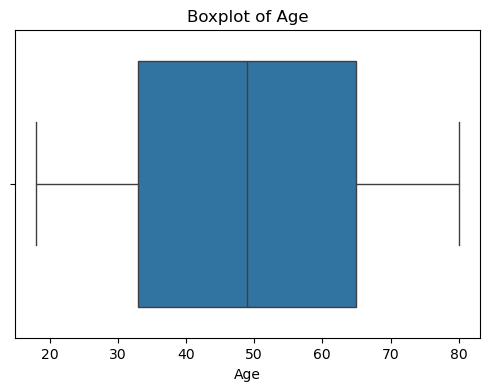

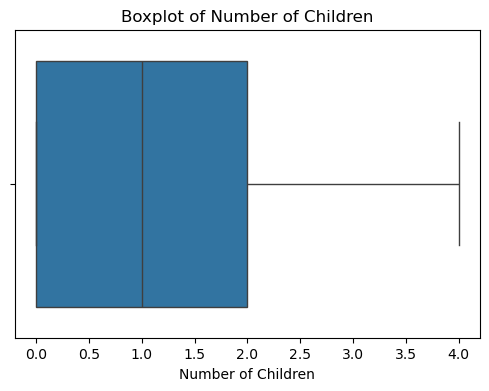

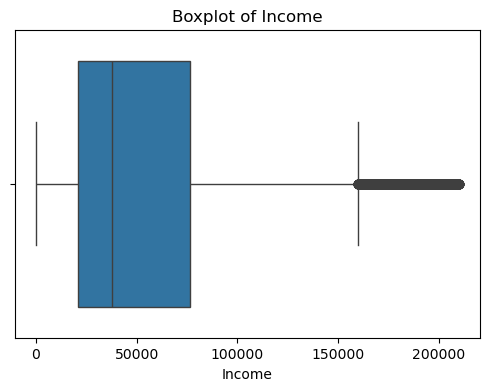

In [12]:
# 8. Checking for Outliers in Numerical Variables using Boxplot
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

* Age: There are no significant outliers in the age distribution, with most individuals falling between 20 and 80.
* Income: There are some high-income outliers, with a small number of individuals earning significantly more than the majority. These outliers may need to be considered or removed depending on the model’s sensitivity to extreme values.
* Number of Children: There are no significant outliers for the number of children, as the maximum is capped at 4.

#### Statistical Test to Understand Feature Importances

In [13]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [14]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# List of categorical columns
categorical_cols = ['Marital Status', 'Education Level', 'Smoking Status', 'Physical Activity Level',
                    'Employment Status', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
                    'History of Substance Abuse', 'Family History of Depression', 'Chronic Medical Conditions']

# Encoding the target variable
df['History of Mental Illness'] = df['History of Mental Illness'].map({'Yes': 1, 'No': 0})

# One-hot encode the categorical columns, excluding the target column
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# Features (X) and target (y)
X = df_encoded.drop(columns=['Name', 'History of Mental Illness'])  # Dropping irrelevant 'Name' column
y = df_encoded['History of Mental Illness']

# Normalizing data for Chi-Square test (Chi-Square test requires non-negative values)
X_minmax = MinMaxScaler().fit_transform(X)

# Perform Chi-Square test
chi_scores = chi2(X_minmax, y)

# Display p-values and feature importance
p_values = pd.Series(chi_scores[1], index=X.columns)
important_features = p_values[p_values < 0.05]  # Features significant at p < 0.05
print("Important Features based on Chi-Square test:\n", important_features)

Important Features based on Chi-Square test:
 Age                                   4.827889e-11
Income                               3.229536e-263
Marital Status_Divorced               5.765434e-05
Marital Status_Single                 3.872224e-05
Marital Status_Widowed                2.375366e-08
Education Level_Associate Degree      8.923698e-73
Education Level_Bachelor's Degree     2.545691e-93
Education Level_High School           2.585653e-89
Education Level_Master's Degree       7.878033e-46
Education Level_PhD                   7.261697e-13
Smoking Status_Current                1.103899e-02
Physical Activity Level_Active        7.036633e-05
Physical Activity Level_Sedentary     2.488983e-04
Employment Status_Employed            0.000000e+00
Employment Status_Unemployed          0.000000e+00
Alcohol Consumption_High              6.473697e-14
Alcohol Consumption_Moderate          4.240635e-05
Dietary Habits_Healthy                5.917721e-62
Dietary Habits_Unhealthy            

##### Chi-Square Test Results for Feature Importance:

The Chi-Square test was used to identify features that have a significant relationship with the target variable, "History of Mental Illness." Below are the key insights based on the p-values of each feature:

###### 1. Age and Income:
- **Age** and **Income** both have extremely low p-values, indicating a strong association with the likelihood of mental illness.
- Older individuals and those with different income levels may have different risks or experiences related to mental health, making these variables important to include in the predictive model.

###### 2. Marital Status:
- Significant categories: **Divorced**, **Single**, and **Widowed**.
- Marital status plays an important role in mental health. For instance, individuals who are divorced, single, or widowed are more likely to be associated with a history of mental illness compared to those who are married (used as the reference category).

###### 3. Education Level:
- Significant categories: **Associate Degree**, **Bachelor’s Degree**, **High School**, **Master’s Degree**, **PhD**.
- Education level has a strong relationship with mental illness. Individuals with different levels of education show varying associations with mental health, where higher education levels may correspond with different mental health outcomes compared to individuals with only a high school education.

###### 4. Smoking Status:
- Significant category: **Current smoker**.
- Current smokers show a statistically significant association with mental health issues, supporting known correlations between smoking and mental health risks.

###### 5. Physical Activity Level:
- Significant categories: **Active** and **Sedentary**.
- Physical activity is strongly related to mental health. Sedentary individuals show a higher likelihood of mental health issues, whereas being physically active seems to have protective effects.

###### 6. Employment Status:
- Both **Employed** and **Unemployed** are highly significant.
- Employment status is crucial for mental health, with both employed and unemployed individuals showing significant relationships with mental illness. This could indicate the importance of occupational stress, job security, or lack thereof, in contributing to mental health outcomes.

###### 7. Alcohol Consumption:
- Significant categories: **High** and **Moderate** consumption.
- Higher alcohol consumption is associated with increased mental health risks, which is consistent with literature showing the negative impact of alcohol misuse on mental health.

###### 8. Dietary Habits:
- Significant categories: **Healthy** and **Unhealthy**.
- Both healthy and unhealthy dietary habits are significantly associated with mental illness. This suggests that diet plays an important role in mental health outcomes, likely reflecting nutritional factors that impact mental well-being.

###### 9. Sleep Patterns:
- Significant categories: **Good** and **Poor**.
- Sleep patterns, particularly poor sleep quality, are strongly associated with mental health issues. Good sleep, on the other hand, shows a protective effect.

###### 10. Family History of Depression:
- **Yes** is significant.
- Having a family history of depression significantly increases the likelihood of experiencing mental illness. This aligns with the known hereditary factors in mental health.

###### 11. Chronic Medical Conditions:
- Both **Yes** and **No** are significant.
- The presence or absence of chronic medical conditions shows a significant relationship with mental health. Chronic conditions may exacerbate stress and mental health challenges, while the absence of chronic illness can be a protective factor.

---

##### Key Takeaways:
- The Chi-Square test reveals that a wide range of factors, including **socio-demographic variables** (age, marital status, education), **lifestyle choices** (physical activity, smoking, alcohol consumption, dietary habits), and **health-related factors** (sleep patterns, family history of depression, chronic medical conditions), are significantly associated with mental health.
- These findings provide a strong basis for variable selection in model-building efforts, ensuring that the most important and relevant features are included.
